In [8]:
from dds.configs.config import set_task, get_config
from dds.train_dds import train_dds

import numpy as onp
funnel_config = get_config()

# Time and step settings (Need to be done before calling set_task)
funnel_config.model.tfinal = 6.4
funnel_config.model.dt = 0.05 #0.05

if funnel_config.model.reference_process_key == "oudstl":
    funnel_config.model.step_scheme_key = "cos_sq"

from dds.targets.toy_targets import get_attr
### SET TASK
task = "forest"
div = 10
c = 100000

# div, e, other_dim = get_attr()
# div = str(div).replace(".", "")
# e = str(e).replace(".", "")
#
# save_name = f"{task}_s{div}_plus{e}_od{other_dim}"


funnel_config = set_task(funnel_config, task, div, c)
funnel_config.model.reference_process_key = "oudstl"

funnel_config.model.reference_process_key = "pisstl"
funnel_config.model.step_scheme_key = "uniform"
funnel_config.model.step_scheme_key = "cos_sq"

# exp_dec
# cos_sq
# uniform
# last_small
# linear_dds
# linear
# uniform_dds

if funnel_config.model.reference_process_key == "oudstl":
    funnel_config.model.step_scheme_key = "cos_sq"
    
    # Opt setting for funnel
    funnel_config.model.sigma = 1.075
    funnel_config.model.alpha = 0.6875
    funnel_config.model.m = 1.0
        
    # Path opt settings    
    funnel_config.model.exp_dds = False


funnel_config.model.stl = False
funnel_config.model.detach_stl_drift = False

# funnel_config.model.stl = True
# funnel_config.model.detach_stl_drift = True

funnel_config.trainer.notebook = True
funnel_config.trainer.epochs = 50
# Opt settings we use
# funnel_config.trainer.learning_rate = 0.0001
funnel_config.trainer.learning_rate = 5 * 10**(-3) #1 * 10**(-2)
funnel_config.trainer.lr_sch_base_dec = 0.90 # For funnel

In [9]:
funnel_config.trainer.epochs = 50
tl_lists = []
vl_lists = []
ta_lists = []
va_lists = []
out_dicts1 = []
task = "forest"
for div in [5, 3, 2]:
    funnel_config = set_task(funnel_config, task, div, c)
    funnel_config.model.input_dim = 1247
    out_dict = train_dds(funnel_config)
    out_dicts1.append(out_dict)
    tl_lists.append([x.item() for x in out_dict[-1]["training_loss"]])
    vl_lists.append([x.item() for x in out_dict[-1]["validation_loss"]])
    ta_lists.append([x.item() for x in out_dict[-1]["training_acc"]])
    va_lists.append([x.item() for x in out_dict[-1]["validation_acc"]])

Best training loss: 0.19879013299942017
Best validation loss: 0.5676440596580505
1000
1000
Best training accuracy: 0.9325000047683716
Best validation accuracy: 0.8700000047683716
Best training accuracy (AVG): 0.9262499570846557
Best validation accuracy (AVG): 0.8469999730587006
WITH VAL
Test Accuracy: 0.8033333420753479
Test Accuracy (AVG): 0.6233333349227905
WITH TRAIN
Test Accuracy: 0.7566666603088379
Test Accuracy (AVG): 0.6066666841506958
('epoch: %s %s  loss: %s', 0, 'TRAIN', -72925.3046875)
('epoch: %s %s  loss: %s', 1, 'TRAIN', -78366.078125)
Best training loss: 0.8641527891159058
Best validation loss: 0.8660430908203125
1000
1000
Best training accuracy: 0.6549999713897705
Best validation accuracy: 0.7299999594688416
Best training accuracy (AVG): 0.629749995470047
Best validation accuracy (AVG): 0.6509999930858612
WITH VAL
Test Accuracy: 0.8033333420753479
Test Accuracy (AVG): 0.6233333349227905
WITH TRAIN
Test Accuracy: 0.7566666603088379
Test Accuracy (AVG): 0.6066666841506958

[[0.8700000047683716, 0.7299999594688416, 0.8399999737739563, 0.8399999737739563, 0.8499999642372131, 0.8799999952316284, 0.7799999713897705, 0.8199999928474426, 0.8399999737739563, 0.8299999833106995, 0.8499999642372131, 0.8399999737739563, 0.8499999642372131, 0.8399999737739563, 0.8299999833106995, 0.8399999737739563, 0.8399999737739563, 0.8399999737739563, 0.8299999833106995, 0.8199999928474426, 0.8100000023841858, 0.8299999833106995, 0.8100000023841858, 0.8100000023841858, 0.8100000023841858], [0.8499999642372131, 0.6899999976158142, 0.8799999952316284, 0.8700000047683716, 0.85999995470047, 0.8499999642372131, 0.8399999737739563, 0.8299999833106995, 0.8399999737739563, 0.8399999737739563, 0.8399999737739563, 0.8399999737739563, 0.8299999833106995, 0.8399999737739563, 0.8299999833106995, 0.8100000023841858, 0.8299999833106995, 0.8399999737739563, 0.8100000023841858, 0.8199999928474426, 0.8100000023841858, 0.8199999928474426, 0.8199999928474426, 0.8100000023841858, 0.8199999928474426

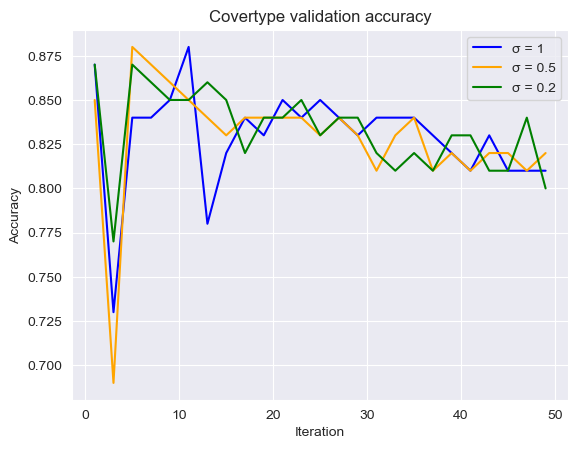

In [14]:
import matplotlib.pyplot as plt

# Combine the lists
labels = ["σ = 1", "σ = 0.5", "σ = 0.2"]#, "10", "15", "20"]
colors = ["blue", "orange", "green"]#, "red", "purple", "yellow"]

# Plot the data

xax = range(1,51,2)
#elbooo = [out_dicts[0][-1]["elbo"], out_dicts1[1][-1]["elbo"], out_dicts1[2][-1]["elbo"]]
# for i, (acc, label, color) in enumerate(zip(va_lists, labels, colors)):
#     plt.plot(xax,acc, label=label, color=color)

for i, (acc, label, color) in enumerate(zip(va_lists, labels, colors)):
    plt.plot(xax,acc, label=label, color=color)

# Add a horizontal line at y = -1
#plt.axhline(y=-0, color="black", linestyle="--")

# Add labels and legend
#plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Covertype validation accuracy")
plt.legend()

print(va_lists)

# SNOOP = [1, 3, 6, 30, 60]
# for idx in SNOOP:
#     for i in (ta_lists):
#         k = i
#         k = sorted(k, reverse=True)
#         print(sum(k[:idx])/idx)



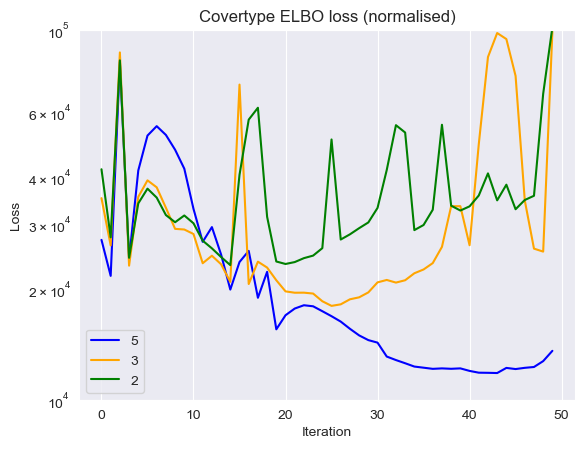

In [13]:
import matplotlib.pyplot as plt
import numpy as np
# Combine the lists
labels = ["5", "3", "2"]#, "10", "15", "20"]
colors = ["blue", "orange", "green"]#, "red", "purple", "yellow"]
d_list = [np.array(out_dicts1[0][-1]["elbo"])+100000, np.array(out_dicts1[1][-1]["elbo"])+100000, np.array(out_dicts1[2][-1]["elbo"])+100000]
# Plot the data
for i, (acc, label, color) in enumerate(zip(d_list, labels, colors)):
    plt.plot(acc, label=label, color=color)

# Add a horizontal line at y = -1
plt.axhline(y=-0, color="black", linestyle="--")

plt.ylim(10000, 100000)

# Add labels and legend
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Covertype ELBO loss (normalised)")
plt.legend()

In [5]:
div = 100
funnel_config.trainer.epochs = 200
acc_lists = []
out_dicts = []
for step in steps:
    funnel_config.model.step_scheme_key = step
    funnel_config = set_task(funnel_config, task, div, c)
    funnel_config.model.input_dim = 10
    out_dict = train_dds(funnel_config)
    out_dicts.append(out_dict)
    acc_lists.append([x.item() for x in out_dict[-1]["training_loss"]])

Best training loss: 107.72550201416016
Best validation loss: 107.72550201416016
('epoch: %s %s  loss: %s', 0, 'TRAIN', -217.37911987304688)
Best training loss: 67.11614990234375
Best validation loss: 67.11614990234375
('epoch: %s %s  loss: %s', 1, 'TRAIN', -461.98382568359375)
Best training loss: 47.8206787109375
Best validation loss: 47.8206787109375
('epoch: %s %s  loss: %s', 2, 'TRAIN', -632.47705078125)
Best training loss: 44.98619842529297
Best validation loss: 44.98619842529297
('epoch: %s %s  loss: %s', 3, 'TRAIN', -1878.9793701171875)
Best training loss: 41.71357345581055
Best validation loss: 41.71357345581055
('epoch: %s %s  loss: %s', 4, 'TRAIN', -3166.87255859375)
Best training loss: 22.157407760620117
Best validation loss: 22.157407760620117
('epoch: %s %s  loss: %s', 5, 'TRAIN', -6750.2119140625)
Best training loss: 14.905227661132812
Best validation loss: 14.905227661132812
('epoch: %s %s  loss: %s', 6, 'TRAIN', -13189.8125)
Best training loss: 12.84011173248291
Best val

1091.0309031946956
1252.7907478153707
14.260656801859538
12.39992696126302
9.972345918019613
3.2637863183021545
9.881803226470947


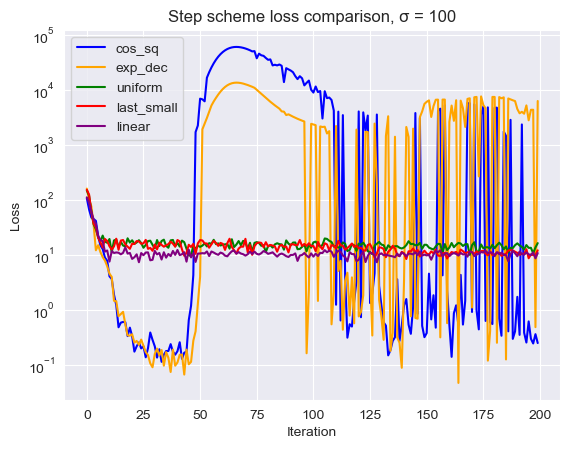

In [24]:
import matplotlib.pyplot as plt

# Combine the lists
labels =steps#, "10", "15", "20"]
l_labels = [steps[0], steps[1], steps[2], steps[3], steps[5]]
colors = ["blue", "orange", "green", "red", "purple"]#, "yellow",  "gray"]
l = [acc_lists[0], acc_lists[1], acc_lists[2], acc_lists[3], acc_lists[4]]
# Plot the data
for i, (acc, label, color) in enumerate(zip(l, l_labels, colors)):
    plt.plot(acc, label=label, color=color)

# Add a horizontal line at y = -1
plt.axhline(y=-0, color="black", linestyle="--")

# Add labels and legend
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Step scheme loss comparison, σ = 100")
plt.legend()

for i in acc_lists:
    k = i
    k = sorted(k)
    print(sum(k[:150])/150)
# Show the plot
plt.show()

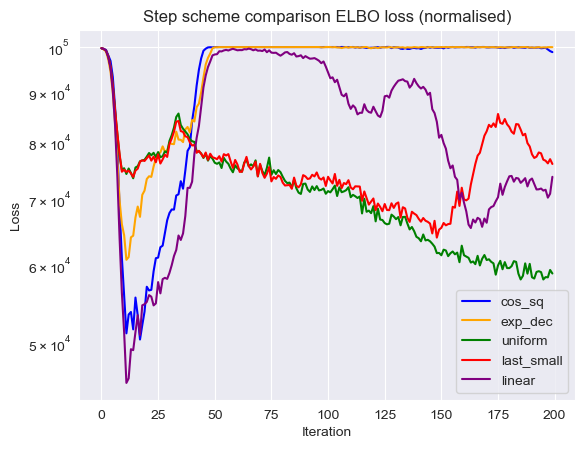

In [21]:
import matplotlib.pyplot as plt
import numpy as np
# Combine the lists
labels = [steps[0], steps[1], steps[2], steps[3], steps[5]]
colors = ["blue", "orange", "green", "red", "purple"]#, "yellow",  "gray"]
d_list = [np.array(out_dicts[0][-1]["elbo"])+100000, np.array(out_dicts[1][-1]["elbo"])+100000, np.array(out_dicts[2][-1]["elbo"])+100000, np.array(out_dicts[3][-1]["elbo"])+100000,
          np.array(out_dicts[4][-1]["elbo"])+100000]
# Plot the data
for i, (acc, label, color) in enumerate(zip(d_list, labels, colors)):
    plt.plot(acc, label=label, color=color)

# Add a horizontal line at y = -1
plt.axhline(y=-0, color="black", linestyle="--")

# Add labels and legend
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Step scheme comparison ELBO loss (normalised)")
plt.legend()

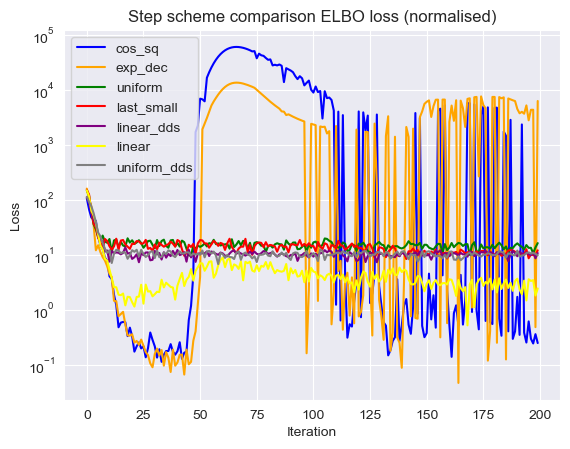

In [15]:
import matplotlib.pyplot as plt
import numpy as np
# Combine the lists
labels = steps#, "10", "15", "20"]
colors = ["blue", "orange", "green", "red", "purple", "yellow",  "gray"]
d_list = [np.array(out_dicts[0][-1]["validation_loss"]), np.array(out_dicts[1][-1]["validation_loss"]), np.array(out_dicts[2][-1]["validation_loss"]), np.array(out_dicts[3][-1]["validation_loss"]), np.array(out_dicts[4][-1]["validation_loss"]),
          np.array(out_dicts[5][-1]["validation_loss"]), np.array(out_dicts[6][-1]["validation_loss"])]
# Plot the data
for i, (acc, label, color) in enumerate(zip(d_list, labels, colors)):
    plt.plot(acc, label=label, color=color)

# Add a horizontal line at y = -1
plt.axhline(y=-0, color="black", linestyle="--")

# Add labels and legend
plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Step scheme comparison ELBO loss (normalised)")
plt.legend()